<a href="https://colab.research.google.com/github/brightxzh/movie_review/blob/main/3-1.Word2Vec_%ED%99%8D%EC%83%81%EC%88%98_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec(gensim) 

- [참조:](https://www.nextobe.com/single-post/2017/06/28/%ED%95%9C%EA%B8%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B0%8F-word2vec%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B6%84%EC%84%9D)

## 환경 설정

In [ ]:
# gensim을 설치합니다. (Gensim은 Python 기반의 Text mining library이며, 토픽 모델링, word2vec도 지원합니다.)
!pip install -U gensim

     |████████████████████████████████| 24.2MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# NLTK를 설치합니다. (자연어 처리를 위해 광범위하게 쓰이는 Python library입니다.)
!pip install nltk

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 460kB 56.7MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### 프로세스

In [ ]:
# 구글 드라이브 연결을 위한 기본 세팅
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# 문서 ID로 실제 파일 불러오는 법
## https://drive.google.com/file/d/1sEXuUaioGLZZsd1YVuyl0sDq7oMf5vcj/view?usp=sharing

rawdata_downloaded = drive.CreateFile({'id': '1sEXuUaioGLZZsd1YVuyl0sDq7oMf5vcj'})
rawdata_downloaded.GetContentFile('moviere_홍상수_csv.csv')

In [ ]:
import pandas as pd

pd.set_option('max_colwidth',500)

# 파일을 DataFrame으로 전환
rawdata = pd.read_csv('moviere_홍상수_csv.csv', header=0,encoding='utf-8', dtype=str, engine='python')

In [ ]:
rawdata

,Unnamed: 0,nickname,text,score,like,dislike,time,watch_movie
0,0,우리동네(nnli****),그때는 맞고 지금은 쳐맞아야지,1,5388,271,2016-06-21 15:03:00,0
1,1,샤막여우(saew****),영화 제목이 의미하는 말 지금(김민희와 불륜)은 맞고 그때(30년전 결혼)는 틀리다. 지금은 틀리고 그때가 맞다 정신차려라 늘그니 양반아,1,2571,201,2016-06-21 13:11:00,0
2,2,이로사사(dnjs****),바람을피면 그때도맞고 지금도 맞아요,1,1954,138,2016-06-21 14:07:00,0
3,3,바ㄱ수지ㄴ(xoxo****),솔직하셔서 좋으시겠어요.,9,1568,179,2015-09-25 00:07:00,관람객
4,4,kink****,'예술'이라는 같잖은 탈을 쓰고 발정난 추한 늙은이의 비겁한 민낯,1,1348,101,2016-06-21 16:23:00,0
...,...,...,...,...,...,...,...,...
4465,1885,신(sino****),김민희배우의인생연기,9,16,38,2017-03-24 00:00:00,관람객
4466,1886,toss****,홍상수 감독님 남자로서 존경합니다,10,8,31,2017-03-28 03:39:00,0
4467,1887,spmi****,김민희 연기가 많이 늘었다,7,21,44,2017-03-23 18:53:00,관람객
4468,1888,마늘(acid****),역시 상수횽이야 고마워,10,25,49,2017-03-23 14:14:00,관람객


In [ ]:
rawtext = pd.DataFrame(rawdata['text'])

In [ ]:
rawtext

,text
0,그때는 맞고 지금은 쳐맞아야지
1,영화 제목이 의미하는 말 지금(김민희와 불륜)은 맞고 그때(30년전 결혼)는 틀리다. 지금은 틀리고 그때가 맞다 정신차려라 늘그니 양반아
2,바람을피면 그때도맞고 지금도 맞아요
3,솔직하셔서 좋으시겠어요.
4,'예술'이라는 같잖은 탈을 쓰고 발정난 추한 늙은이의 비겁한 민낯
...,...
4465,김민희배우의인생연기
4466,홍상수 감독님 남자로서 존경합니다
4467,김민희 연기가 많이 늘었다
4468,역시 상수횽이야 고마워


In [ ]:
rawtext.dropna(axis=0)

,text
0,그때는 맞고 지금은 쳐맞아야지
1,영화 제목이 의미하는 말 지금(김민희와 불륜)은 맞고 그때(30년전 결혼)는 틀리다. 지금은 틀리고 그때가 맞다 정신차려라 늘그니 양반아
2,바람을피면 그때도맞고 지금도 맞아요
3,솔직하셔서 좋으시겠어요.
4,'예술'이라는 같잖은 탈을 쓰고 발정난 추한 늙은이의 비겁한 민낯
...,...
4465,김민희배우의인생연기
4466,홍상수 감독님 남자로서 존경합니다
4467,김민희 연기가 많이 늘었다
4468,역시 상수횽이야 고마워


In [ ]:
## 공백값(NAN) 제거
rawtext = rawtext.dropna(axis=0)

In [ ]:
import time
start_vect=time.time()

from konlpy.tag import Okt
from konlpy.utils import pprint
okt = Okt()

pos = lambda d: [''.join(p) for p in okt.nouns(d)]
texts_ko = [pos(result) for result in rawtext['text']]

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 0.33 Minutes


In [ ]:
texts_ko

[['그때', '지금'],
 ['영화',
  '제목',
  '의미',
  '말',
  '지금',
  '김민희',
  '불륜',
  '은',
  '그때',
  '결혼',
  '지금',
  '그때',
  '정신차려라',
  '늘',
  '그니',
  '양반'],
 ['바람', '피', '그때', '지금'],
 [],
 ['예술', '탈', '발정', '늙은이', '민낯'],
 ['홍상수', '김민희', '자전', '이야기'],
 ['영화', '시사회', '가슴', '아내', '평생', '꿈', '생각', '지옥'],
 ['지금', '그때', '니', '평점'],
 ['끼리', '풀', '발기', '영화', '편', '불륜', '미화', '사랑'],
 ['저',
  '살',
  '여배우',
  '꼬시면',
  '내',
  '이',
  '정도',
  '능력',
  '남',
  '현실',
  '대중',
  '영화',
  '편',
  '이름',
  '빨',
  '인성',
  '쓰레기',
  '감독'],
 ['예술', '이해력', '이해', '노력', '감독', '의도', '파악', '못', '일인'],
 ['김민희'],
 ['지금', '그', '때'],
 ['영화',
  '통해',
  '사하나',
  '하나',
  '눈물',
  '감동',
  '그게',
  '감정',
  '진심',
  '어이',
  '스스로',
  '홍상수',
  '감독',
  '이영화',
  '통해',
  '사랑',
  '감정',
  '사람',
  '반드시'],
 ['이', '영화', '볼때', '왜', '감독', '본인', '현실'],
 ['감독', '와이프', '걸', '보고', '얼굴', '화끈거렸다더', '진짝', '최악', '홍상수', '자전', '영화'],
 ['척',
  '예술',
  '시각',
  '갖은',
  '척',
  '말',
  '노력',
  '사람',
  '모든',
  '진실',
  '후',
  '그',
  '그냥',
  '멍청이'],
 ['영화', '왜', '다큐'],
 ['불

In [ ]:
start_vect=time.time()

# training 모델 훈련

from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)
## size=차원의 숫자(올라갈수록 상세히 하지만 느림) 100
## window=주변을 보는 범위(앞뒤 5) 
## min_count=최소 출현 빈도 100
## workers=사용하는 CPU 코어 숫자
## iter = 반복횟수 10
## sg= CBOW=0 / Skip-Gram=1

#from gensim.models import FastText
#wv_model_ko = FastText(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)


wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec_e.model')

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 0.09 Minutes


In [ ]:
## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

## 총 단어 숫자
len(model.wv.vocab.keys())

4443

In [ ]:
## 전체 단어 리스트
list(model.wv.index2word)

['영화',
 '홍상수',
 '김민희',
 '감독',
 '사랑',
 '연기',
 '것',
 '지금',
 '생각',
 '사람',
 '그때',
 '그',
 '불륜',
 '이',
 '말',
 '배우',
 '예술',
 '수',
 '정말',
 '정재영',
 '점',
 '왜',
 '작품',
 '자기',
 '더',
 '이야기',
 '진짜',
 '내',
 '나',
 '평점',
 '그냥',
 '뭐',
 '보고',
 '현실',
 '역시',
 '때',
 '좀',
 '인간',
 '느낌',
 '남',
 '이해',
 '영화로',
 '인생',
 '재미',
 '듯',
 '남자',
 '대사',
 '여자',
 '자신',
 '대한',
 '우리',
 '매력',
 '처음',
 '시간',
 '최고',
 '하나',
 '마음',
 '속',
 '순간',
 '볼',
 '거',
 '감정',
 '걸',
 '중',
 '변명',
 '다른',
 '둘',
 '가장',
 '저',
 '홍',
 '상황',
 '또',
 '쓰레기',
 '차이',
 '내용',
 '혼자',
 '니',
 '삶',
 '안',
 '정도',
 '자체',
 '뿐',
 '움',
 '다시',
 '계속',
 '모든',
 '의미',
 '본인',
 '장면',
 '관객',
 '알',
 '평론가',
 '개인',
 '얘기',
 '일',
 '자격',
 '세상',
 '별로',
 '포장',
 '돈',
 '두',
 '위',
 '때문',
 '사생활',
 '영희',
 '표현',
 '난',
 '앞',
 '중간',
 '평가',
 '보기',
 '번',
 '기억',
 '정신',
 '요',
 '한번',
 '점도',
 '당신',
 '공감',
 '제목',
 '꼭',
 '모습',
 '임',
 '해변',
 '합리화',
 '금은',
 '무슨',
 '건',
 '함',
 '무엇',
 '조금',
 '욕',
 '여배우',
 '술',
 '얼마나',
 '모두',
 '줄',
 '이번',
 '연출',
 '주인공',
 '일상',
 '미화',
 '이영화',
 '개',
 '가지',
 '사실',
 '여운',
 '선택

In [ ]:
# test 결과보기
print(wv_model_ko.most_similar(pos('홍상수'), topn=50))

[('감독', 0.9949295520782471), ('역시', 0.992806077003479), ('처음', 0.9902684688568115), ('중', 0.987748920917511), ('정말', 0.9860250949859619), ('가장', 0.9842019081115723), ('최고', 0.9840356111526489), ('느낌', 0.9784031510353088), ('제일', 0.9782326221466064), ('번', 0.9779683947563171), ('매력', 0.9715127348899841), ('배우', 0.9706616401672363), ('홍', 0.9697790741920471), ('영화', 0.9676154851913452), ('특유', 0.9670949578285217), ('볼', 0.9664648771286011), ('연출', 0.9656291604042053), ('스타일', 0.9649757146835327), ('이번', 0.9645569324493408), ('연기력', 0.964034914970398), ('대사', 0.9579089879989624), ('작품', 0.9575397968292236), ('재미', 0.9573326706886292), ('항상', 0.9571641683578491), ('김민희', 0.9567803740501404), ('별로', 0.9560928344726562), ('두', 0.950340747833252), ('여운', 0.9495562314987183), ('웃음', 0.9495209455490112), ('중간', 0.9491648077964783), ('위', 0.9476040005683899), ('듯', 0.9473727941513062), ('내내', 0.9464872479438782), ('다시', 0.9464303255081177), ('팬', 0.9455190896987915), ('인상', 0.945095419883728), (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
# test 결과보기
print(wv_model_ko.most_similar(pos('김민희'), topn=50))

[('정재영', 0.9952293634414673), ('배우', 0.9930093884468079), ('매력', 0.9928443431854248), ('연기', 0.9909073114395142), ('최고', 0.9851219654083252), ('정말', 0.9826305508613586), ('대사', 0.9804425835609436), ('중간', 0.9798186421394348), ('역시', 0.9767347574234009), ('연기력', 0.9762299656867981), ('연출', 0.9700905680656433), ('진짜', 0.9667515158653259), ('중', 0.963109016418457), ('특유', 0.9607618451118469), ('가장', 0.9606015682220459), ('웃음', 0.9583261013031006), ('홍상수', 0.9567805528640747), ('제일', 0.9559940099716187), ('느낌', 0.9552938938140869), ('위', 0.9502688050270081), ('재미', 0.9498077034950256), ('스타일', 0.9490138292312622), ('내내', 0.9481390714645386), ('인상', 0.9467535018920898), ('처음', 0.9445286393165588), ('감독', 0.9440720677375793), ('이번', 0.9433688521385193), ('번', 0.9409780502319336), ('계속', 0.9400344491004944), ('듯', 0.9390466213226318), ('두', 0.93825364112854), ('술', 0.9378911256790161), ('팬', 0.9366109371185303), ('작품', 0.9363062977790833), ('여운', 0.9359855055809021), ('장면', 0.9359740018844604

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print(wv_model_ko.most_similar(positive=[u'연애'], negative=[u'현실'], topn=50))

[('열자', 0.49249058961868286), ('순간', 0.4085661768913269), ('남', 0.3705701231956482), ('사랑', 0.3598715364933014), ('자격', 0.35096368193626404), ('니', 0.3472709655761719), ('당신', 0.33778512477874756), ('금은', 0.30005717277526855), ('상처', 0.2943984270095825), ('우리', 0.28492963314056396), ('얼마나', 0.2843012809753418), ('그때', 0.2830025851726532), ('해변', 0.28250664472579956), ('주먹', 0.2756681740283966), ('욕망', 0.27498388290405273), ('혼자', 0.27465832233428955), ('밤', 0.2692829966545105), ('세상', 0.2638399600982666), ('선택', 0.2603592276573181), ('인간', 0.25397789478302), ('인생', 0.25131046772003174), ('천억', 0.24543306231498718), ('지금', 0.24475310742855072), ('말', 0.24386343359947205), ('행동', 0.24345524609088898), ('매', 0.24324911832809448), ('가족', 0.24214933812618256), ('책임', 0.2399858832359314), ('자식', 0.23776891827583313), ('언제', 0.2342735379934311), ('예술', 0.2292437106370926), ('간통죄', 0.2234865128993988), ('둘', 0.2222021222114563), ('합리화', 0.22200626134872437), ('죄', 0.22006535530090332), ('놈', 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실', '사랑'], negative=[u'불륜'], topn=50))

[('영희', 0.9336988925933838), ('속', 0.9298349618911743), ('대한', 0.9290000796318054), ('모두', 0.9285575151443481), ('그녀', 0.927925169467926), ('이야기', 0.9266102910041809), ('감정', 0.9260730147361755), ('자신', 0.9244945049285889), ('남자', 0.923676609992981), ('것', 0.9229780435562134), ('모습', 0.921406626701355), ('모든', 0.9153755307197571), ('고독', 0.9149154424667358), ('누구', 0.9133486747741699), ('대해', 0.9132985472679138), ('그', 0.9132007360458374), ('서로', 0.9130082130432129), ('삶', 0.9128459692001343), ('주인공', 0.9123904705047607), ('위해', 0.9087539911270142), ('뿐', 0.90868079662323), ('그것', 0.9083020091056824), ('여자', 0.907709002494812), ('세계', 0.9076998829841614), ('응원', 0.906768262386322), ('고백', 0.9055869579315186), ('집', 0.9055230617523193), ('표현', 0.9055027961730957), ('심리', 0.9051322937011719), ('세상', 0.9050919413566589), ('시작', 0.904643177986145), ('마음', 0.9045535922050476), ('포기', 0.9045525789260864), ('과정', 0.9043764472007751), ('자유', 0.9042566418647766), ('파도', 0.9041967391967773), ('투

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(wv_model_ko.most_similar(positive=[u'나이', '결혼'], negative=[u'노망', '기분'], topn=50))

[('지금', 0.4535815417766571), ('그때', 0.4527472257614136), ('금은', 0.35157454013824463), ('때', 0.3438876271247864), ('홍상수', 0.2934940755367279), ('번', 0.2841049134731293), ('순간', 0.2828828692436218), ('다른', 0.2762417793273926), ('처음', 0.272863507270813), ('홍', 0.2654421925544739), ('십자', 0.2650362253189087), ('상황', 0.26095694303512573), ('감독', 0.25619417428970337), ('그', 0.24981653690338135), ('배우', 0.24243129789829254), ('수', 0.24104544520378113), ('영화', 0.2346990704536438), ('항상', 0.23402799665927887), ('차이', 0.23386970162391663), ('내', 0.23217326402664185), ('생각', 0.22986038029193878), ('두', 0.22899067401885986), ('제목', 0.22079002857208252), ('역시', 0.21891748905181885), ('중', 0.21557901799678802), ('더', 0.21169789135456085), ('나', 0.21117787063121796), ('보고', 0.21052294969558716), ('매력', 0.2101958990097046), ('무엇', 0.2089136838912964), ('이', 0.20816095173358917), ('느낌', 0.2031228393316269), ('하나', 0.20007699728012085), ('볼', 0.19556717574596405), ('최고', 0.19273172318935394), ('반복', 0.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


## 시각화

### http://projector.tensorflow.org/


### Publish 용 링크
http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/ddokbaro/1d57b83de08d791e2905e9726fe1c215/raw/a6178fe978bdacd12d81da49d92eecb40e4b572a/test.json


### Publish 참조 페이지
https://medium.com/@aakashchotrani/visualizing-your-own-word-embeddings-using-tensorflow-688b3a7750ee


### 전체Top1000

In [ ]:
# your current directory 
!pwd

## 한국어:     !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
## 번자체한자: !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip"

!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"

# remove files in zip file if they exist
!rm LICENSE_OFL.txt README *.otf 

# unzip downloaded files
## 한국어: !unzip NotoSansCJKkr-hinted.zip
## 번체자한자: !unzip NotoSerifCJKtc-hinted.zip

!unzip NotoSansCJKkr-hinted.zip

# move font files to 'fonts/truetype' directory
## 한국어: !mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/
## 번체자한자: !mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

/content
--2020-11-15 12:39:17--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  37.3MB/s    in 3.1s    

2020-11-15 12:39:20 (37.3 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

rm: cannot remove 'LICENSE_OFL.txt': No such file or directory
rm: cannot remove 'README': No such file or directory
rm: cannot remove '*.otf': No such file or directory
Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: N

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:300,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4443
[-0.01768069  0.01979764 -0.06154461  0.00667444 -0.02353553 -0.06404306
 -0.02860581 -0.05295993 -0.03325299  0.05635531]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])
df.shape

(300, 2)

In [ ]:
df.head(10)

,x,y
그때,-14.458738,-1.631591
지금,-4.494521,14.937485
영화,-13.832840,15.111126
제목,-12.174725,-7.071505
의미,-11.470597,4.765503
말,-12.561960,-4.294467
김민희,-16.129843,12.565276
불륜,16.691790,-15.814233
은,-9.301671,-7.741908
결혼,-2.519865,-9.299625


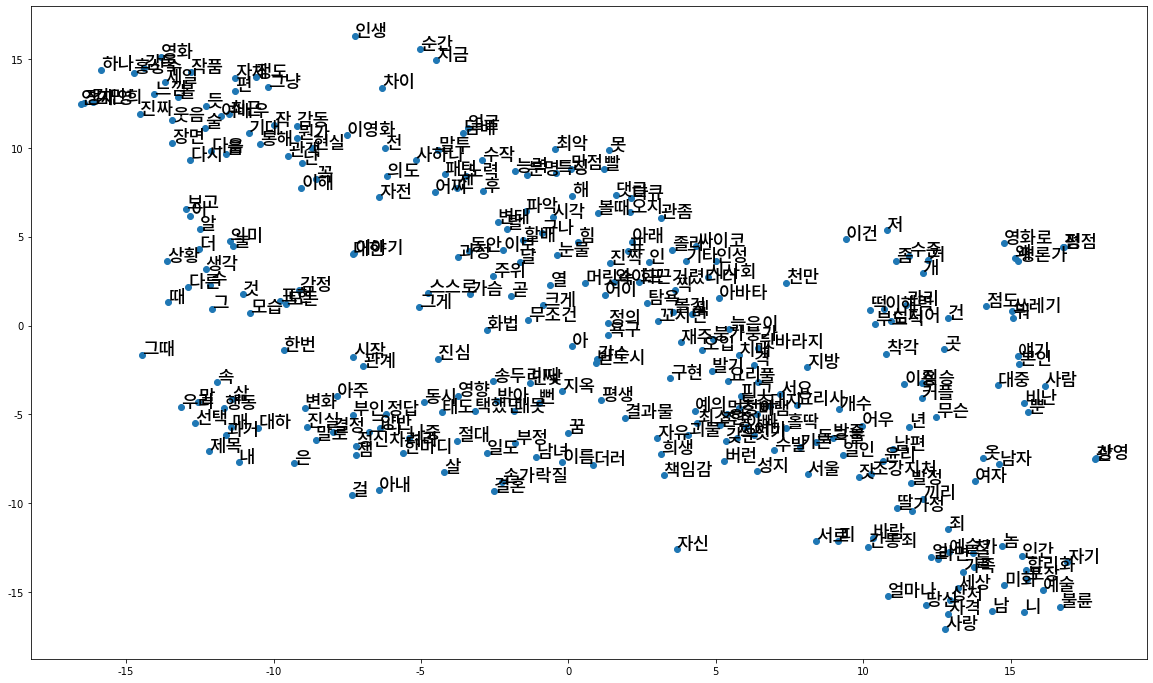

In [ ]:
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
fontprop = fm.FontProperties(fname=path, size=18)

fig = plt.figure()
fig.set_size_inches(20, 12)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()

### 전체 시각화

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
tsne = TSNE(n_components=3)

In [ ]:
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=3, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
import time
start_vect=time.time()

X_tsne = tsne.fit_transform(X)
# X_tsne = tsne.fit_transform(X)

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 3.84 Minutes


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y', 'z'])
df.shape

(4443, 3)

In [ ]:
df

,x,y,z
그때,9.436799,1.282827,-5.842192
지금,9.424565,1.284871,-5.841633
영화,15.403778,0.255834,-4.263854
제목,8.796484,2.506963,-5.277323
의미,10.289861,3.249697,-2.752272
...,...,...,...
상수횽,6.958103,6.832721,1.356764
곡성,-0.011038,-6.847327,3.258300
정돈,-1.253491,-7.273895,3.101664
적년,-1.170894,-6.644700,4.157721


In [ ]:
df.to_csv('dimension.tsv', sep="\t", index=False, header=None, encoding='utf-8')

In [ ]:
df['words'] = df.index
words = df['words']
words.to_csv('words.tsv', sep="\t", index=False, header=None, encoding='utf-8')